## Clicking and scrolling
Sometimes it isn't as simple as just loading a page and grabbing what you want. Web pages are dynamic, often you need to click on things and scroll down pages to render the elements you need.

In [1]:
from selenium.webdriver.common.by import By
from selene.core.selenium.driver import get_driver, stop_driver
from selene.core.selenium.page import PageSelene
from selene.core.selenium.conditions import *

### Getting started
As with the previous example, get the driver and load up a PageSelene object from a url. We won't bother with the logger this time.

In [2]:
driver = get_driver(width=1024, height=768)
url = 'https://www.scrapethissite.com/pages/ajax-javascript/'
page = PageSelene.from_url(driver, url)

Check what the page we've loaded up looks like:

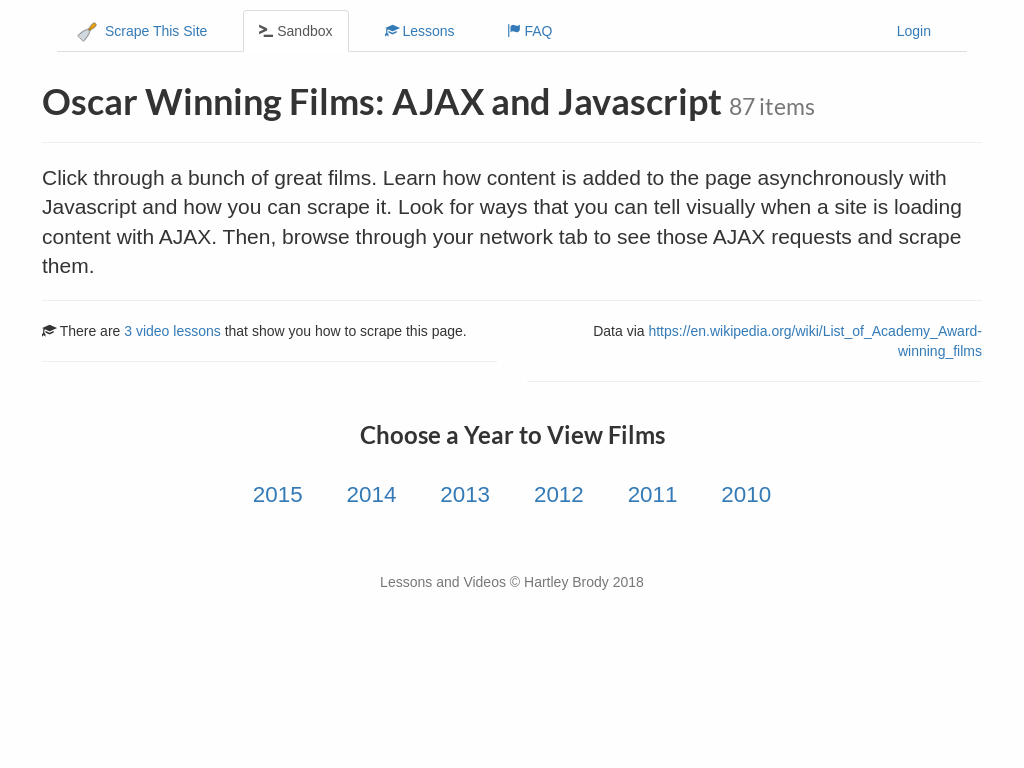

In [3]:
page.screenshot_to_notebook(driver)

### Clicking
Most web pages have clickable elements that either navigate to another page or bring up a new window within the current page. In this case, we want to click on the "year" elements to reveal the associated data before we can retrieve it.

The first thing to do is get the element you need to click on. Selene also has some helpful functions to check elements for certain features - line 3 of the cell below is checking to see if the given element is "active", i.e. has it been clicked yet!

In [4]:
element = page.find(driver, By.ID, '2015')
print(element.text)
print(bool_element_class_contains(driver, element, string='active', wait=0.1, logger=None))

2015
False


Element (ElementSelene) objects have a click() method which does it exactly what it says on the tin: 

In [5]:
element.click(driver)

True

Now if we check to see if the element is active:

In [6]:
print(bool_element_class_contains(driver, element, string='active', wait=0.1, logger=None))

True


.... and we check to see what the page looks like now, we see that the data has rendered on the page and we can now gather it using the element retrieval functionality:

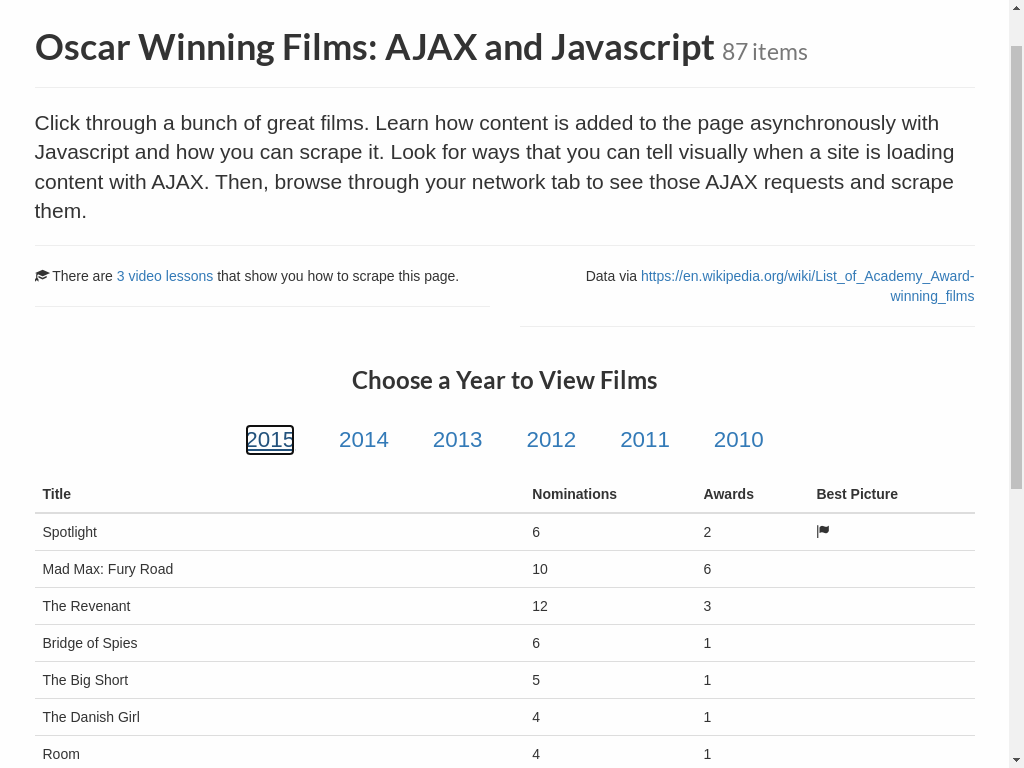

In [7]:
page.screenshot_to_notebook(driver)

### Scrolling
For some webpages, you may need to scroll to render certain elements, or to take a certain screenshot. There are several different functions for scrolling in selene - review the API for full details. Here's one example:

In [8]:
page.scroll_to_bottom(driver)

True

... check the screenshot to confirm we have successfully scrolled to the bottom of the page:

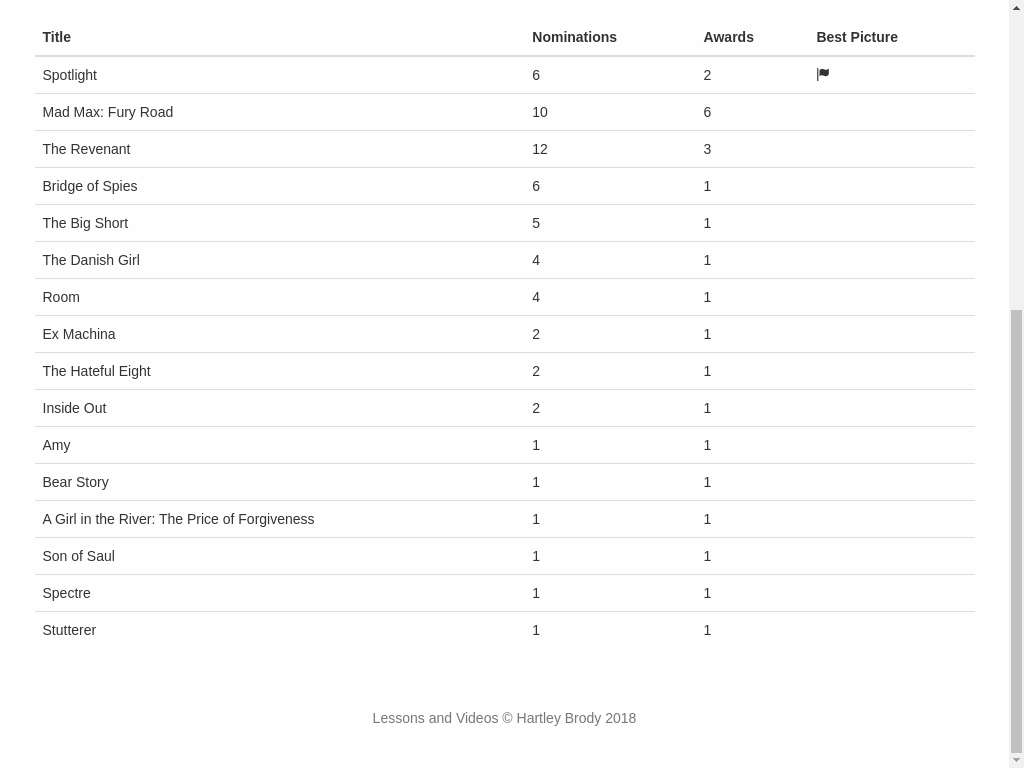

In [9]:
page.screenshot_to_notebook(driver)

In [10]:
stop_driver(driver)